## Build a machine learning model that predicts blood cells type and its bounding box 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Understanding Data

In [2]:
import json

with open('train\_annotations.coco.json','r') as f:
    data= json.load(f)

df_images = pd.DataFrame(data=data['images'])
df_images.head()

,id,license,file_name,height,width,date_captured
0,0,1,BloodImage_00322_jpg.rf.eedd60c6eefc381592560a...,416,416,2021-02-24T08:05:45+00:00
1,1,1,BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f01...,416,416,2021-02-24T08:05:45+00:00
2,2,1,BloodImage_00003_jpg.rf.ee39595c63b95b284250a0...,416,416,2021-02-24T08:05:45+00:00
3,3,1,BloodImage_00197_jpg.rf.ee89cf9b69359bd12dfc53...,416,416,2021-02-24T08:05:45+00:00
4,4,1,BloodImage_00249_jpg.rf.efd1305bf8f45e6fdb4a7f...,416,416,2021-02-24T08:05:45+00:00


In [4]:
df_annot= pd.DataFrame(data['annotations'])
df_annot.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,1,"[289, 327, 20, 29]",580,[],0
1,1,0,1,"[42, 210, 25, 34]",850,[],0
2,2,0,1,"[16, 335, 25, 34]",850,[],0
3,3,0,3,"[67, 147, 149, 192]",28608,[],0
4,4,1,3,"[283, 271, 82, 106]",8692,[],0


In [5]:
df_annot['image_id'].value_counts()

image_id
624    30
1      30
579    30
673    25
140    25
       ..
696     1
386     1
636     1
684     1
362     1
Name: count, Length: 765, dtype: int64

In [6]:
cat= pd.DataFrame(data['categories'])
cat

,id,name,supercategory
0,0,cells,none
1,1,Platelets,cells
2,2,RBC,cells
3,3,WBC,cells


# Matching images with their boudning boxes

In [8]:
bbox=df_annot.loc[df_annot['image_id'] ==13, 'bbox']
bbox

197    [76, 284, 144, 131]
Name: bbox, dtype: object

In [9]:
see=bbox.to_list()
see

[[76, 284, 144, 131]]

In [225]:
new_col = []
for t in range(0,765,1):
    bb =df_annot.loc[df_annot['image_id'] ==t,'bbox']
    bb= bb.to_list()
    new_col.append(bb)


In [11]:
df_images['bound']= new_col
df_images

,id,license,file_name,height,width,date_captured,bound
0,0,1,BloodImage_00322_jpg.rf.eedd60c6eefc381592560a...,416,416,2021-02-24T08:05:45+00:00,"[[289, 327, 20, 29], [42, 210, 25, 34], [16, 3..."
1,1,1,BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f01...,416,416,2021-02-24T08:05:45+00:00,"[[283, 271, 82, 106], [124, 95, 70, 106], [182..."
2,2,1,BloodImage_00003_jpg.rf.ee39595c63b95b284250a0...,416,416,2021-02-24T08:05:45+00:00,"[[191, 214, 146, 167], [137, 242, 72, 92], [10..."
3,3,1,BloodImage_00197_jpg.rf.ee89cf9b69359bd12dfc53...,416,416,2021-02-24T08:05:45+00:00,"[[1, 270, 62, 88], [0, 155, 36, 122], [196, 93..."
4,4,1,BloodImage_00249_jpg.rf.efd1305bf8f45e6fdb4a7f...,416,416,2021-02-24T08:05:45+00:00,"[[49, 1, 144, 123], [114, 239, 138, 171], [193..."
...,...,...,...,...,...,...,...
760,760,1,BloodImage_00100_jpg.rf.85c3a15e63e8d3208297c1...,416,416,2021-02-24T08:05:45+00:00,"[[210, 146, 81, 74], [129, 96, 98, 76], [127, ..."
761,761,1,BloodImage_00349_jpg.rf.85f21728c452c93f3f639c...,416,416,2021-02-24T08:05:45+00:00,"[[41, 93, 112, 64], [164, 12, 92, 66], [1, 40,..."
762,762,1,BloodImage_00010_jpg.rf.8b245203e6326d0b77f51c...,416,416,2021-02-24T08:05:45+00:00,"[[30, 291, 181, 124], [1, 78, 188, 190], [116,..."
763,763,1,BloodImage_00407_jpg.rf.9563d988b980a069101ff5...,416,416,2021-02-24T08:05:45+00:00,"[[328, 151, 78, 90], [349, 25, 66, 94], [329, ..."


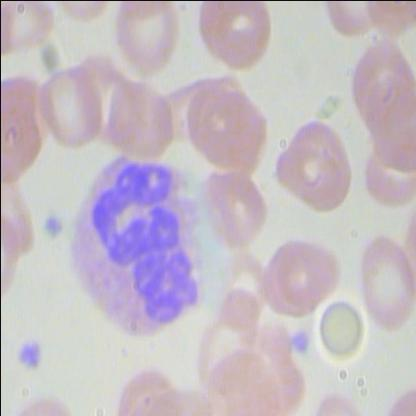

In [14]:
from IPython.display import Image
Image('E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg')

E:/data sciences/bbx/train/BloodImage_00268_jpg.rf.f23e12f889d9decc21ee5192ea63eb9f.jpg


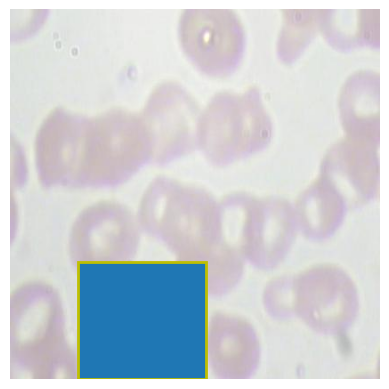

In [17]:
from matplotlib.patches import Rectangle
from PIL import Image
def plot_image(row_no):
    start='E:/data sciences/bbx/train/'
    fin=df_images['file_name'][row_no]
    full= start+fin
    print(full)
    # open image
    plt.imshow(Image.open(full))
    plt.axis('off')
    #draw boxes
    for i in df_images['bound'][row_no]:
        # print(i)
        x_min,y_min,w,h = i[0],i[1],i[2],i[3]
        plt.gca().add_patch(plt.Rectangle((x_min,y_min),w,h,linewidth=2,edgecolor='y'))
        # plt.show()

plot_image(13)

E:/data sciences/bbx/train/BloodImage_00268_jpg.rf.f23e12f889d9decc21ee5192ea63eb9f.jpg


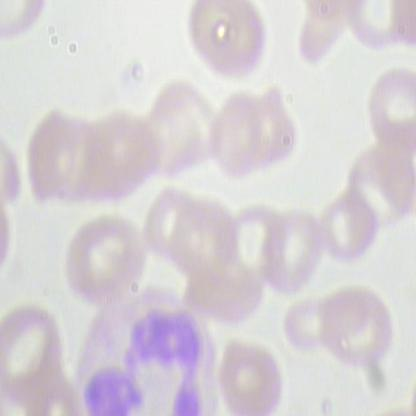

In [18]:
from IPython.display import Image
start='E:/data sciences/bbx/train/'
fin=df_images['file_name'][13]
full= start+fin
print(full)
Image('E:/data sciences/bbx/train/BloodImage_00268_jpg.rf.f23e12f889d9decc21ee5192ea63eb9f.jpg')

In [19]:
sum=[]
for i in df_images['bound']:
    lenght= len(i)
    sum.append(lenght)

max(sum), min(sum)
 

(30, 1)

# Add first path of filename

In [20]:
kwanza= 'E:/data sciences/bbx/train/'
fn=[kwanza+ i for i in df_images['file_name']]
fn[:10]

['E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00003_jpg.rf.ee39595c63b95b284250a05045ad1e07.jpg',
 'E:/data sciences/bbx/train/BloodImage_00197_jpg.rf.ee89cf9b69359bd12dfc532b80d4024e.jpg',
 'E:/data sciences/bbx/train/BloodImage_00249_jpg.rf.efd1305bf8f45e6fdb4a7f7ced319a65.jpg',
 'E:/data sciences/bbx/train/BloodImage_00087_jpg.rf.f02b79ff40c84ed3a997d212448c6bda.jpg',
 'E:/data sciences/bbx/train/BloodImage_00081_jpg.rf.f16ca52afcb7b4e0eb6eaee462c90a42.jpg',
 'E:/data sciences/bbx/train/BloodImage_00018_jpg.rf.f07e1ffc1b4fbf4063b6462cc4f8056b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00308_jpg.rf.f0e7e2a50a1ee8a001e14a78155fbeff.jpg',
 'E:/data sciences/bbx/train/BloodImage_00367_jpg.rf.f1359dd8a22323b1639da40647041ca6.jpg']

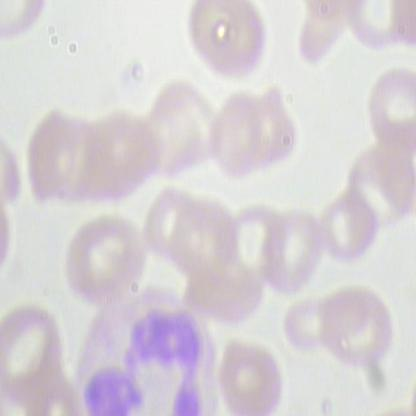

In [21]:
Image(fn[13])

In [22]:
df_images['file_name']= fn

# Match Category_ID with blood component

In [23]:
mapping={
    2:'RBC',
    3:'WBC',
    1:'Platelets',
}


In [24]:
mapping.get(2)

'RBC'

In [25]:
df_annot['category_id'].value_counts()

category_id
2    8814
3     789
1     739
Name: count, dtype: int64

In [27]:
cat_1= df_annot.loc[df_annot['category_id']==1,'bbox']
cat_1

0        [289, 327, 20, 29]
1         [42, 210, 25, 34]
2         [16, 335, 25, 34]
31         [87, 98, 28, 42]
32        [244, 55, 22, 34]
                ...        
10262     [400, 24, 15, 39]
10279    [338, 197, 34, 27]
10328     [87, 210, 48, 68]
10329     [347, 99, 32, 42]
10330     [312, 17, 36, 36]
Name: bbox, Length: 739, dtype: object

In [29]:
id= df_images['id']
fns=df_images['file_name']

In [30]:
id_dict= dict(zip(id,fns))
id_dict

{0: 'E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 1: 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 2: 'E:/data sciences/bbx/train/BloodImage_00003_jpg.rf.ee39595c63b95b284250a05045ad1e07.jpg',
 3: 'E:/data sciences/bbx/train/BloodImage_00197_jpg.rf.ee89cf9b69359bd12dfc532b80d4024e.jpg',
 4: 'E:/data sciences/bbx/train/BloodImage_00249_jpg.rf.efd1305bf8f45e6fdb4a7f7ced319a65.jpg',
 5: 'E:/data sciences/bbx/train/BloodImage_00087_jpg.rf.f02b79ff40c84ed3a997d212448c6bda.jpg',
 6: 'E:/data sciences/bbx/train/BloodImage_00081_jpg.rf.f16ca52afcb7b4e0eb6eaee462c90a42.jpg',
 7: 'E:/data sciences/bbx/train/BloodImage_00018_jpg.rf.f07e1ffc1b4fbf4063b6462cc4f8056b.jpg',
 8: 'E:/data sciences/bbx/train/BloodImage_00308_jpg.rf.f0e7e2a50a1ee8a001e14a78155fbeff.jpg',
 9: 'E:/data sciences/bbx/train/BloodImage_00367_jpg.rf.f1359dd8a22323b1639da40647041ca6.jpg',
 10: 'E:/data sciences/bbx/train/BloodImage_00054_

In [31]:
add_fn=[]
for idx in df_annot['image_id']:
    add_fn.append(id_dict.get(idx))
add_fn

['E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 'E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 'E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 'E:/data sciences/bbx/train/BloodImage_00322_jpg.rf.eedd60c6eefc381592560aeee7116b58.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb97208b.jpg',
 'E:/data sciences/bbx/train/BloodImage_00037_jpg.rf.ef13a4cb5aed602be72f013cbb9

In [32]:
all_cat= []
for i in df_annot['category_id']:
    all_cat.append(mapping.get(i))
all_cat[:10]

['Platelets',
 'Platelets',
 'Platelets',
 'WBC',
 'WBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC',
 'RBC']

In [33]:
df_annot['Filepaths'] =add_fn
df_annot['name'] =all_cat

In [34]:
df_annot.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd,Filepaths,name
0,0,0,1,"[289, 327, 20, 29]",580,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets
1,1,0,1,"[42, 210, 25, 34]",850,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets
2,2,0,1,"[16, 335, 25, 34]",850,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets
3,3,0,3,"[67, 147, 149, 192]",28608,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,WBC
4,4,1,3,"[283, 271, 82, 106]",8692,[],0,E:/data sciences/bbx/train/BloodImage_00037_jp...,WBC


In [157]:
norm_list= []
for i in df_annot['bbox']:
    q,w,e,r =i
    a,s,d,f= round(q/416,4),round(w/416,4),round(e/416,4),round(r/416,4)
    fin= a,s,d,f
    fin = list(fin)
    norm_list.append(fin)

In [159]:
df_annot['norm_bbox']=norm_list

In [160]:
df_annot.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd,Filepaths,name,norm_bbox
0,0,0,1,"[289, 327, 20, 29]",580,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets,"[0.6947, 0.7861, 0.0481, 0.0697]"
1,1,0,1,"[42, 210, 25, 34]",850,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets,"[0.101, 0.5048, 0.0601, 0.0817]"
2,2,0,1,"[16, 335, 25, 34]",850,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,Platelets,"[0.0385, 0.8053, 0.0601, 0.0817]"
3,3,0,3,"[67, 147, 149, 192]",28608,[],0,E:/data sciences/bbx/train/BloodImage_00322_jp...,WBC,"[0.1611, 0.3534, 0.3582, 0.4615]"
4,4,1,3,"[283, 271, 82, 106]",8692,[],0,E:/data sciences/bbx/train/BloodImage_00037_jp...,WBC,"[0.6803, 0.6514, 0.1971, 0.2548]"


E:/data sciences/bbx/train/BloodImage_00196_jpg.rf.00dbef6299c3fd80267c1402a60b4272.jpg
[33, 42, 198, 166]
WBC


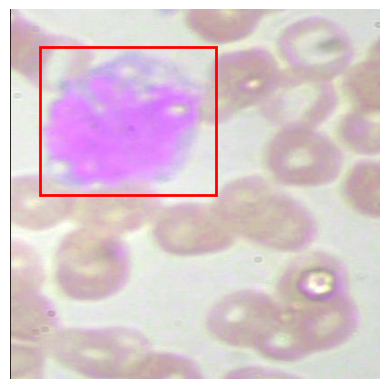

In [261]:
from matplotlib.patches import Rectangle
from PIL import Image
def plot_image(file_no):
    full= df_annot['Filepaths'][file_no]
    print(full)
    print(df_annot['bbox'][file_no])
    print(df_annot['name'][file_no])
    # open image
    plt.imshow(Image.open(full))
    plt.axis('off')
    x_min,y_min,w,h = df_annot['bbox'][file_no][0],df_annot['bbox'][file_no][1],df_annot['bbox'][file_no][2],df_annot['bbox'][file_no][3]
    plt.gca().add_patch(plt.Rectangle((x_min,y_min),w,h,linewidth=2,edgecolor='r',facecolor='none'))
plot_image(736)

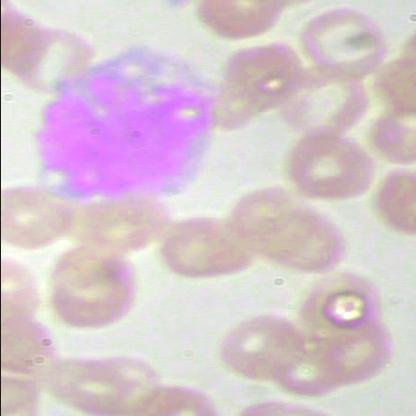

In [262]:
from IPython.display import Image
Image(df_annot['Filepaths'][736])

In [ ]:
df_annot = df_annot.sample(frac=1,ignore_index=True)
df_annot.head(15)

In [38]:
labels= df_annot['name'].to_numpy()
unique_labels = np.unique(labels)

all_labels= [label == unique_labels for label in labels]
all_labels[:10]

[array([ True, False, False]),
 array([ True, False, False]),
 array([ True, False, False]),
 array([False, False,  True]),
 array([False, False,  True]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([False,  True, False]),
 array([False,  True, False])]

- We can see that we have fully align images with bbox, as well as filepaths.
- This marks end of data preparation_part 1


# Splitting the data


In [161]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
x= df_annot['Filepaths']
y= all_labels
box= df_annot['norm_bbox'].to_list()

x_train, x_test, y_train ,y_test,box_train,box_test = train_test_split(x[:1000], y[:1000],box[:1000], train_size=0.8)


In [40]:
box_train[:13]

[[95, 215, 77, 96],
 [171, 1, 78, 85],
 [125, 44, 48, 110],
 [140, 1, 57, 74],
 [150, 300, 52, 78],
 [204, 301, 78, 64],
 [289, 240, 102, 79],
 [205, 363, 73, 52],
 [222, 31, 92, 72],
 [16, 67, 60, 82],
 [49, 1, 144, 123],
 [271, 197, 131, 186],
 [263, 64, 112, 117]]

# Next step will be data preparation_part 2 
- Converting images to tensors

In [41]:
import tensorflow as tf
import keras

In [ ]:
def preprocess_images(file_path):
    image =tf.io.read_file(file_path)
    image=tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[416,416])
    return image

In [126]:
see= preprocess_images(df_annot['Filepaths'][13])

In [136]:
box_train[:5]
a,s,d,f = box_train[0]
q,w,e,r=round(a/416,4),round(s/416,4),round(d/416,4),round(f/416,4)
fin= q,w,e,r
print(fin)

(0.2284, 0.5168, 0.1851, 0.2308)


In [162]:
def get_image_label(file_path,label,b_box):
    norm_box_b =tf.convert_to_tensor(b_box)
    image = preprocess_images(file_path)

    return image, (label,norm_box_b)

In [103]:
data= tf.data.Dataset.from_tensor_slices((tf.constant(x_train[:13]),tf.cast(box_train[:13],dtype=tf.float32),tf.constant(y_train[:13])))
data = data.map(get_image_label).batch(2)
data.element_spec

(TensorSpec(shape=(None, 416, 416, 3), dtype=tf.float32, name=None),
 (TensorSpec(shape=(None, 4), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 3), dtype=tf.bool, name=None)))

## Building Batches for easier loading of data to the model

In [164]:
batch_size=32
def Batch(x,y=None,box_=None,validation_data=False,test_data=False,batch_size= batch_size):

    if test_data:
        print('Creating tersing data batches....')
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x)))
        data_batch= data.map(preprocess_images).batch(batch_size)
        return data_batch
    
    elif validation_data:
        print('Creating validation data batches....')
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y),tf.cast(box_,dtype=np.float32)))
        data_batch= data.map(get_image_label).batch(batch_size)
        return data_batch
    else:
        print('Creating training data batches....')
        data= tf.data.Dataset.from_tensor_slices((tf.constant(x),
                                                tf.constant(y), tf.cast(box_,dtype=np.float32)))
        data= data.map(get_image_label)
        data= data.shuffle(buffer_size=len(x))
        data_batch= data.batch(batch_size)
        return data_batch

In [165]:
train_data= Batch(x_train,y_train,box_train)
val_data= Batch(x_test,y_test,box_test,validation_data=True)

Creating training data batches....
Creating validation data batches....


In [166]:
train_data.element_spec,  val_data.element_spec

((TensorSpec(shape=(None, 416, 416, 3), dtype=tf.float32, name=None),
  (TensorSpec(shape=(None, 3), dtype=tf.bool, name=None),
   TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))),
 (TensorSpec(shape=(None, 416, 416, 3), dtype=tf.float32, name=None),
  (TensorSpec(shape=(None, 3), dtype=tf.bool, name=None),
   TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))))

- Our  data is in correct Format we can now build the model

In [167]:
from tensorflow.keras.layers import Dense,Dropout, Conv2D,BatchNormalization,Flatten,Input,MaxPooling2D
from tensorflow.keras.models import Model, Sequential


input_SHAPE= [416,416,3]

In [226]:
inputs = Input(shape=input_SHAPE)
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((3,3))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((4, 4))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((3,3))(x)

x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)

class_output = Dense(3, activation='sigmoid', name='class_output')(x)
bbox_output = Dense(4, activation='linear', name='bbox_output')(x)
model = Model(inputs=inputs, outputs=[class_output, bbox_output])
model.compile(
    optimizer='adam',
    loss={'class_output': 'binary_crossentropy', 'bbox_output': 'mse'},
    loss_weights={'class_output': 0.8, 'bbox_output': 0.2},
    metrics={'class_output': 'accuracy', 'bbox_output': 'mae'}
)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 416, 416,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 414, 414,  │        896 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_6     │ (None, 138, 138,  │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 136, 136,  │     18,496 │ max_pooling2d_6[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_7     │ (None, 34, 34,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 32, 32,    │     73,856 │ max_pooling2d_7[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_8     │ (None, 10, 10,    │          0 │ conv2d_8[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 12800)     │          0 │ max_pooling2d_8[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │  3,277,056 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 256)       │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 3)         │        771 │ dropout_2[0][0]   │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │      1,028 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 3,372,103 (12.86 MB)

 Trainable params: 3,372,103 (12.86 MB)

 Non-trainable params: 0 (0.00 B)

In [227]:
early_stop= tf.keras.callbacks.EarlyStopping(monitor='class_output_accuracy', patience=2,mode='max')

In [228]:
model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    validation_freq=1,
    callbacks= early_stop
)

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - bbox_output_mae: 0.3640 - class_output_accuracy: 0.7285 - loss: 0.3699 - val_bbox_output_mae: 0.1857 - val_class_output_accuracy: 0.8350 - val_loss: 0.2993
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - bbox_output_mae: 0.2803 - class_output_accuracy: 0.8608 - loss: 0.2940 - val_bbox_output_mae: 0.1629 - val_class_output_accuracy: 0.8350 - val_loss: 0.2868
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - bbox_output_mae: 0.2509 - class_output_accuracy: 0.8710 - loss: 0.2706 - val_bbox_output_mae: 0.1519 - val_class_output_accuracy: 0.8350 - val_loss: 0.2846
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - bbox_output_mae: 0.2434 - class_output_accuracy: 0.8664 - loss: 0.2646 - val_bbox_output_mae: 0.1575 - val_class_output_accuracy: 0.8350 - val_loss: 0.2821


## Testing our Model

In [229]:
with open('E:/data sciences/bbx/valid\_annotations.coco.json',) as d:
    valid_ =json.load(d)

validation_images_data=pd.DataFrame(data=valid_['images'])
validation_images_data 

,id,license,file_name,height,width,date_captured
0,0,1,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...,416,416,2021-02-24T08:05:45+00:00
1,1,1,BloodImage_00092_jpg.rf.07d98e3b1f4fe1ed2eecf6...,416,416,2021-02-24T08:05:45+00:00
2,2,1,BloodImage_00086_jpg.rf.0c41cbdcf1bdf6b266f28c...,416,416,2021-02-24T08:05:45+00:00
3,3,1,BloodImage_00377_jpg.rf.0c8524be5de7a9ef2d1faa...,416,416,2021-02-24T08:05:45+00:00
4,4,1,BloodImage_00076_jpg.rf.1b0b14116c3227f60519a0...,416,416,2021-02-24T08:05:45+00:00
...,...,...,...,...,...,...
68,68,1,BloodImage_00404_jpg.rf.d9bd79bb34f49130776fc6...,416,416,2021-02-24T08:05:45+00:00
69,69,1,BloodImage_00093_jpg.rf.ecfe1a244fe6f77d8100df...,416,416,2021-02-24T08:05:45+00:00
70,70,1,BloodImage_00182_jpg.rf.c0dde7b2c7ed04bf4ce73c...,416,416,2021-02-24T08:05:45+00:00
71,71,1,BloodImage_00296_jpg.rf.d1e417e0e79924d42be3fd...,416,416,2021-02-24T08:05:45+00:00


In [230]:
filepaths_dict=dict(zip(validation_images_data['id'],validation_images_data['file_name']))

In [231]:
filepaths_dict.get(3)

'BloodImage_00377_jpg.rf.0c8524be5de7a9ef2d1faa43043e0fe9.jpg'

In [232]:
validation__= pd.DataFrame(data=valid_['annotations'])
validation__

,id,image_id,category_id,bbox,area,segmentation,iscrowd
0,0,0,2,"[136, 301, 67.5, 77]",5197.50,[],0
1,1,0,2,"[185, 241, 78, 85]",6630.00,[],0
2,2,0,2,"[69, 233, 71, 104]",7384.00,[],0
3,3,0,2,"[67, 148, 65.5, 92]",6026.00,[],0
4,4,0,2,"[34, 67, 63.5, 89.5]",5683.25,[],0
...,...,...,...,...,...,...,...
962,962,72,2,"[24, 129, 74, 77]",5698.00,[],0
963,963,72,2,"[22, 199, 59, 67.5]",3982.50,[],0
964,964,72,2,"[139, 54, 62, 93.5]",5797.00,[],0
965,965,72,2,"[39, 308, 67.5, 89.5]",6041.25,[],0


In [233]:
add_filepaths= [filepaths_dict.get(fn) for fn in validation__['image_id']]
validation__['filepaths'] =add_filepaths

In [234]:
validation__.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths
0,0,0,2,"[136, 301, 67.5, 77]",5197.50,[],0,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...
1,1,0,2,"[185, 241, 78, 85]",6630.00,[],0,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...
2,2,0,2,"[69, 233, 71, 104]",7384.00,[],0,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...
3,3,0,2,"[67, 148, 65.5, 92]",6026.00,[],0,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...
4,4,0,2,"[34, 67, 63.5, 89.5]",5683.25,[],0,BloodImage_00228_jpg.rf.04ee883d828bddd9a8ec6b...


In [235]:
mwanzo='E:/data sciences/bbx/valid/'
addition=[]
for i in validation__['filepaths']:
    addition.append(mwanzo+i)
validation__['filepaths']=addition
validation__.head()

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths
0,0,0,2,"[136, 301, 67.5, 77]",5197.50,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...
1,1,0,2,"[185, 241, 78, 85]",6630.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...
2,2,0,2,"[69, 233, 71, 104]",7384.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...
3,3,0,2,"[67, 148, 65.5, 92]",6026.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...
4,4,0,2,"[34, 67, 63.5, 89.5]",5683.25,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...


In [236]:
validation__['category_id'].value_counts()

category_id
2    819
1     76
3     72
Name: count, dtype: int64

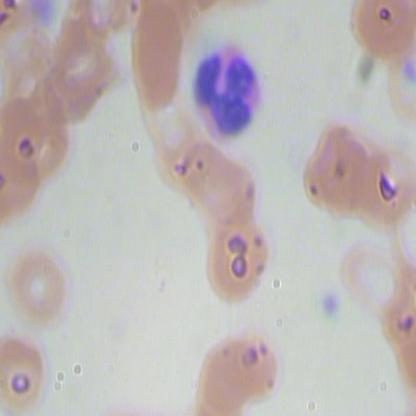

In [237]:
from IPython.display import Image

Image(validation__['filepaths'][13])

In [238]:
test_data= Batch(validation__['filepaths'], test_data=True)


Creating tersing data batches....


In [239]:
predictions =model.predict(test_data)

31/31 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step


In [240]:
def get_predicted_label(pred_probability):
    return unique_labels[np.argmax(pred_probability)]

In [272]:
predicted_label = [get_predicted_label(predictions[0][i]) for i in range(len(predictions[0]))]


In [242]:
mapping.get(1)

'Platelets'

In [271]:
mapped_label= [mapping.get(weka) for weka in validation__['category_id']]


In [244]:
validation__['Real_label']=mapped_label
validation__['Pred_label']=predicted_label

In [245]:
validation__

,id,image_id,category_id,bbox,area,segmentation,iscrowd,filepaths,Real_label,Pred_label
0,0,0,2,"[136, 301, 67.5, 77]",5197.50,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...,RBC,RBC
1,1,0,2,"[185, 241, 78, 85]",6630.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...,RBC,RBC
2,2,0,2,"[69, 233, 71, 104]",7384.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...,RBC,RBC
3,3,0,2,"[67, 148, 65.5, 92]",6026.00,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...,RBC,RBC
4,4,0,2,"[34, 67, 63.5, 89.5]",5683.25,[],0,E:/data sciences/bbx/valid/BloodImage_00228_jp...,RBC,RBC
...,...,...,...,...,...,...,...,...,...,...
962,962,72,2,"[24, 129, 74, 77]",5698.00,[],0,E:/data sciences/bbx/valid/BloodImage_00109_jp...,RBC,RBC
963,963,72,2,"[22, 199, 59, 67.5]",3982.50,[],0,E:/data sciences/bbx/valid/BloodImage_00109_jp...,RBC,RBC
964,964,72,2,"[139, 54, 62, 93.5]",5797.00,[],0,E:/data sciences/bbx/valid/BloodImage_00109_jp...,RBC,RBC
965,965,72,2,"[39, 308, 67.5, 89.5]",6041.25,[],0,E:/data sciences/bbx/valid/BloodImage_00109_jp...,RBC,RBC


In [246]:
pd.crosstab(validation__['Pred_label'], validation__['Pred_label'])

Pred_label,RBC
Pred_label,
RBC,967


In [247]:
correct=0
wrong=0
for i in range(len(validation__)):
    if validation__['Pred_label'][i] == validation__['Real_label'][i]:
        correct+=1
    else:
        wrong+=1

correct

819

In [248]:
wrong

148

In [249]:
correct/967

0.8469493278179938

In [251]:
val_images=[]
for image in test_data.unbatch().as_numpy_iterator():
    val_images.append(image)

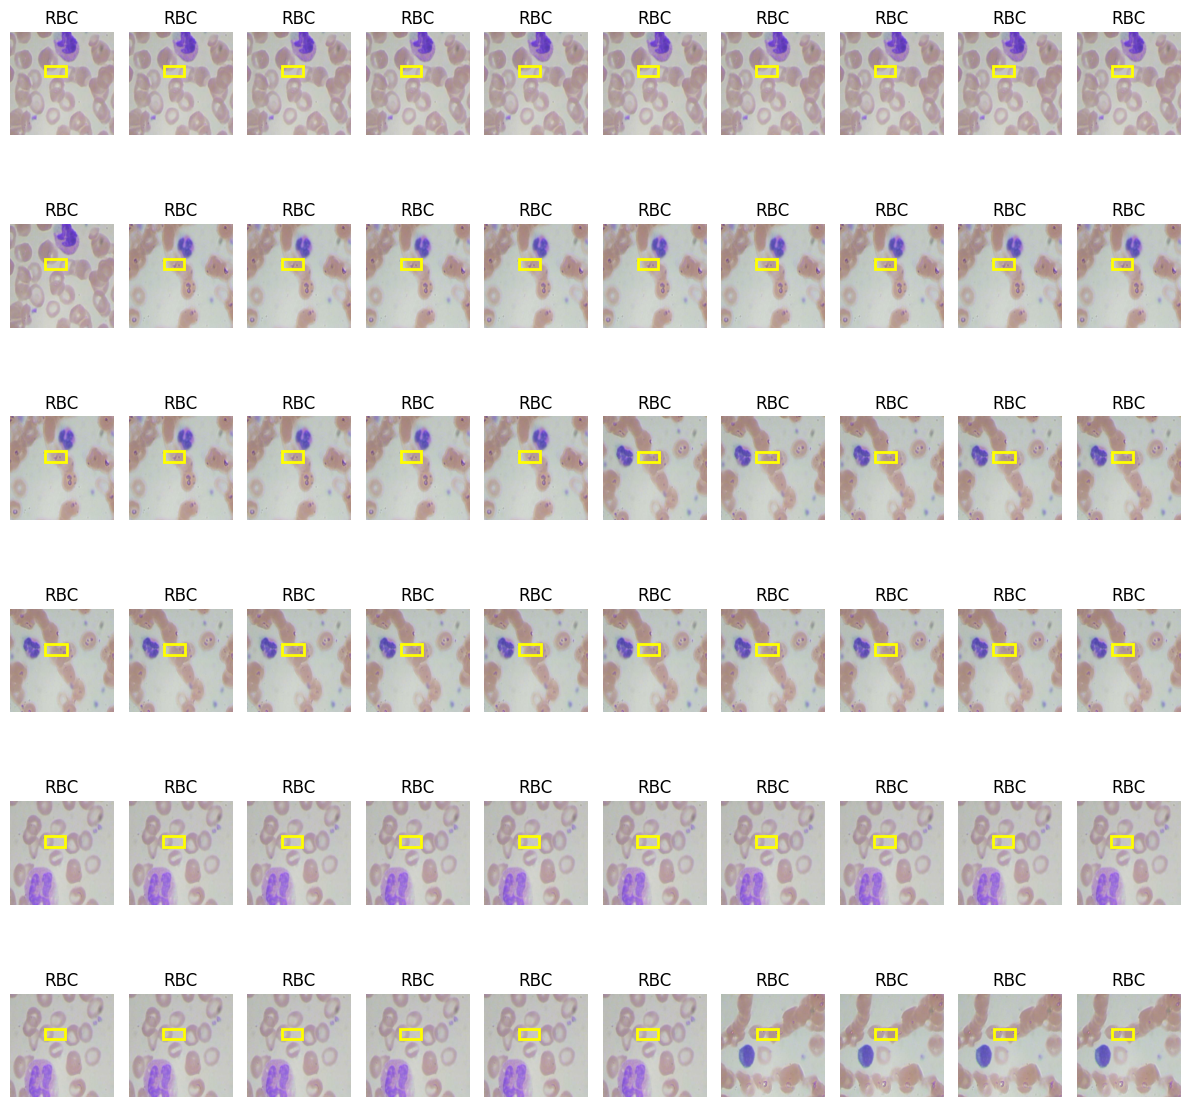

In [253]:
import matplotlib.patches as patches
plt.figure(figsize=(12, 12))
for i, image in enumerate(val_images[:60]): 
    plt.subplot(6,10, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(predicted_label[i])

    # Bounding box coordinates (normalized)
    a, b, c, d = predictions[1][i]  
    
    x = a * 416
    y = b * 416
    w = c * 416
    h = d * 416

    ax = plt.gca()
    rect = patches.Rectangle((x, y), w, h,
                             linewidth=2,
                             edgecolor='yellow',
                             facecolor='none')
    ax.add_patch(rect)

plt.tight_layout()
plt.show()
